In [1]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-amanz-my/resolve/main/parsed.jsonl -O amanz-my.jsonl

In [2]:
# !wget https://huggingface.co/datasets/mesolitica/twitter-dedup/resolve/main/dedup-twitter.jsonl

In [3]:
# !wget https://huggingface.co/datasets/mesolitica/fb-malaysian-pages/resolve/main/dedup.jsonl -O fb-dedup.jsonl

In [4]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-iium-confession/resolve/main/crawled-iium.json

In [5]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-astroawani/resolve/main/combined.jsonl -O astroawani.jsonl

In [6]:
# !wget https://huggingface.co/datasets/mesolitica/pdf-text-dedup/resolve/main/academia-dedup.jsonl

In [7]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-bernama/resolve/main/parse-bernama.json

In [8]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-b-cari-com-my/resolve/main/everything.jsonl -O b-cari-com-my.jsonl

In [9]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-c-cari-com-my/resolve/main/everything.jsonl -O c-cari-com-my.jsonl

In [10]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-carigold/resolve/main/politics.json -O carigold-politics.json
# !wget https://huggingface.co/datasets/mesolitica/crawl-carigold/resolve/main/current-issues.json -O carigold-current-issues.json
# !wget https://huggingface.co/datasets/mesolitica/crawl-carigold/resolve/main/santai-others.json -O carigold-santai-others.json
# !wget https://huggingface.co/datasets/mesolitica/crawl-carigold/resolve/main/everything.jsonl -O carigold.jsonl

In [11]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-cn-cari-com-my/resolve/main/dedup.jsonl -O cn-cari-com-my.jsonl

In [12]:
# !wget https://huggingface.co/datasets/mesolitica/pdf-text-dedup/resolve/main/eprints-dedup.jsonl -O eprints.jsonl

In [13]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-fmt/resolve/main/parsed-fmt.jsonl

In [14]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-malaysian-hansard/resolve/main/hansard.jsonl

In [15]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-hardwarezone-sg/resolve/main/everything.jsonl -O hardwarezone-sg.jsonl

In [16]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-jbtalks/resolve/main/everything.jsonl -O jbtalks.jsonl

In [17]:
# !wget https://huggingface.co/datasets/tnwei/ms-newspapers/resolve/main/kosmo-20230524.jsonl
# !wget https://huggingface.co/datasets/tnwei/ms-newspapers/resolve/main/utusan-20230512.jsonl

In [18]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-lom-agc-gov-my/resolve/main/dedup.jsonl -O agc-gov-my.jsonl

In [19]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-lowyat/resolve/main/kopitiam.json
# !wget https://huggingface.co/datasets/mesolitica/crawl-lowyat/resolve/main/SeriousKopitiam.json
# !wget https://huggingface.co/datasets/mesolitica/crawl-lowyat/resolve/main/PolitiKs.json
# !wget https://huggingface.co/datasets/mesolitica/crawl-lowyat/resolve/main/PropertyTalk.json

In [20]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-mycarforum-com/resolve/main/everything.jsonl -O mycarforum.jsonl

In [21]:
# !wget https://huggingface.co/datasets/mesolitica/pdf-text-dedup/resolve/main/parlimen-gov-dedup.jsonl -O parlimen-gov.jso

In [22]:
# !wget https://huggingface.co/datasets/mesolitica/crawl-salary-sg/resolve/main/everything.jsonl -O salary-sg.jsonl

In [23]:
# !wget https://huggingface.co/datasets/mesolitica/wikipedia/resolve/main/wikipedia-2023-06-10.jsonl -O wikipedia.jsonl

In [24]:
# !wget https://huggingface.co/datasets/mesolitica/common-crawl-dedup/resolve/main/dedup.jsonl -O common-crawl.jsonl

In [25]:
# !wget https://huggingface.co/datasets/mesolitica/pdf-text-dedup/resolve/main/pdfdrive-dedup.jsonl -O pdfdrive.jsonl

In [26]:
# !wget https://huggingface.co/datasets/mesolitica/NLLB-zsm_Latn-dedup/resolve/main/dedup-eng_Latn-zsm_Latn.jsonl

In [27]:
# !wget https://huggingface.co/datasets/mesolitica/reddit/resolve/main/dedup.jsonl -O reddit.jsonl

In [28]:
# !wget https://huggingface.co/datasets/mesolitica/cc-100-ms-dedup/resolve/main/dedup.jsonl -O cc-100.jsonl

In [29]:
# !wget https://huggingface.co/mesolitica/fasttext-language-detection-v2/resolve/main/fasttext.bin

In [30]:
import fasttext

model = fasttext.load_model('/home/husein/dev/malaya/pretrained-model/language-detection-v2/model-16.bin')

In [31]:
import malaya
from malaya.text.function import language_detection_textcleaning
import json
import sys
from tqdm import tqdm
from glob import glob

In [32]:
t = '几时的啊？ 这个礼拜的话很难搞下。 到处都有喜宴跟月光晚会。'
c = language_detection_textcleaning(t)
model.predict(c)

(('__label__local-mandarin',), array([0.95308328]))

In [33]:
t = 'goblok'
c = language_detection_textcleaning(t)
model.predict(c)

(('__label__socialmedia-indonesian',), array([1.00003004]))

In [34]:
from collections import defaultdict

count = defaultdict(int)
size = defaultdict(int)

In [35]:
langs = {}
def write(lang, text):
    if lang not in langs:
        langs[lang] = open(f'{lang}.jsonl', 'w')
    langs[lang].write(f'{json.dumps(text)}\n')
    langs[lang].flush()

In [36]:
with open('amanz-my.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        for p_ in data['p'] + [data['title']]:
            c = language_detection_textcleaning(p_)
            if not len(c.strip()):
                continue
            l = model.predict(c)[0][0]
            count[l] += 1
            s = sys.getsizeof(p_)
            size[l] += s
            write(l, p_)

33733it [00:06, 5561.01it/s]


In [37]:
with open('dedup-twitter.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

12711645it [04:16, 49524.66it/s]


In [38]:
with open('fb-dedup.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

193375it [00:03, 49631.52it/s]


In [39]:
with open('crawled-iium.json') as fopen:
    data = json.load(fopen)
for d in tqdm(data):
    for p_ in d['p']:
        c = language_detection_textcleaning(p_)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(p_)
        size[l] += s
        write(l, p_)

100%|█████████████████████████████████████████████████████████████████████████████████████| 28335/28335 [00:18<00:00, 1556.25it/s]


In [40]:
with open('astroawani.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        if 'r' not in data:
            continue
        if 'errors' in data['r']['response']:
            continue
        for p_ in [
            data['r']['response']['title'],
            data['r']['response']['imageCaption'],
            data['r']['response']['articleBody']
        ]:
            c = language_detection_textcleaning(p_)
            if not len(c.strip()):
                continue
            l = model.predict(c)[0][0]
            count[l] += 1
            s = sys.getsizeof(p_)
            size[l] += s
            write(l, p_)

80000it [00:28, 2852.42it/s]


In [41]:
with open('academia-dedup.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

1409it [00:59, 23.49it/s]


In [42]:
with open('parse-bernama.json') as fopen:
    data = json.load(fopen)
    
for d_ in tqdm(data):
    for p_ in [d_['text']] + d_['p']:
        c = language_detection_textcleaning(p_)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(p_)
        size[l] += s
        write(l, p_)

100%|█████████████████████████████████████████████████████████████████████████████████████| 30952/30952 [00:08<00:00, 3853.50it/s]


In [43]:
with open('b-cari-com-my.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

4444726it [03:58, 18662.86it/s]


In [44]:
with open('c-cari-com-my.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

12234733it [07:31, 26404.44it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
for f in glob('carigold-*'):
    with open(f) as fopen:
        data = json.load(fopen)
        for d in tqdm(data):
            c = language_detection_textcleaning(d)
            if not len(c.strip()):
                continue
            l = model.predict(c)[0][0]
            count[l] += 1
            s = sys.getsizeof(d)
            size[l] += s
            write(l, d)

100%|████████████████████████████████████████████████████████████████████████████████| 1265509/1265509 [00:45<00:00, 27804.88it/s]


In [46]:
with open('cn-cari-com-my.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

62865it [02:28, 423.79it/s]


In [47]:
with open('eprints.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

207860it [06:10, 511.18it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [48]:
with open('parsed-fmt.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        for p_ in [data['title']] + data['p']:
            c = language_detection_textcleaning(p_)
            if not len(c.strip()):
                continue
            l = model.predict(c)[0][0]
            count[l] += 1
            s = sys.getsizeof(p_)
            size[l] += s
            write(l, p_)

254434it [02:17, 1850.73it/s]


In [49]:
with open('hansard.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)['original']
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

142766it [00:53, 2652.69it/s]


In [50]:
with open('hardwarezone-sg.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

7014988it [05:33, 18375.23it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [51]:
with open('jbtalks.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

802953it [00:33, 23947.15it/s]


In [52]:
with open('kosmo-20230524.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)['text']
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

51700it [00:09, 5692.04it/s]


In [53]:
with open('utusan-20230512.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)['text']
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

164570it [00:30, 5346.29it/s]


In [54]:
with open('agc-gov-my.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

1739it [00:02, 740.94it/s] 


In [55]:
with open('parlimen-gov.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

2190it [00:43, 50.55it/s]


In [56]:
with open('salary-sg.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

231202it [00:14, 15549.36it/s]


In [57]:
with open('wikipedia.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)['text']
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

434321it [00:30, 14130.06it/s]


In [58]:
with open('common-crawl.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

395635it [04:44, 1391.57it/s]


In [59]:
with open('pdfdrive.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

5919it [03:58, 24.84it/s]


In [60]:
with open('dedup-eng_Latn-zsm_Latn.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

15816934it [05:34, 46915.61it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [61]:
with open('reddit.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

1191600it [00:31, 37707.64it/s]


In [62]:
with open('cc-100.jsonl') as fopen:
    for l in tqdm(fopen):
        data = json.loads(l)
        c = language_detection_textcleaning(data)
        if not len(c.strip()):
            continue
        l = model.predict(c)[0][0]
        count[l] += 1
        s = sys.getsizeof(data)
        size[l] += s
        write(l, data)

11238341it [05:32, 37520.13it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [63]:
count

defaultdict(int,
            {'__label__local-english': 13201047,
             '__label__standard-english': 4944358,
             '__label__standard-malay': 48123120,
             '__label__local-malay': 49190512,
             '__label__standard-mandarin': 1026621,
             '__label__socialmedia-indonesian': 1896037,
             '__label__standard-indonesian': 92439,
             '__label__other': 416821,
             '__label__local-mandarin': 13151852,
             '__label__manglish': 6034839})

In [66]:
size

defaultdict(int,
            {'__label__local-english': 4324253464,
             '__label__standard-english': 12633203034,
             '__label__standard-malay': 20825188332,
             '__label__local-malay': 10608884263,
             '__label__standard-mandarin': 2084161958,
             '__label__socialmedia-indonesian': 955524546,
             '__label__standard-indonesian': 4167570747,
             '__label__other': 205631313,
             '__label__local-mandarin': 4424441384,
             '__label__manglish': 3305410702})

In [65]:
with open('count-llm.json', 'w') as fopen:
    json.dump(dict(count), fopen)

In [71]:
with open('size-llm.json', 'w') as fopen:
    json.dump(dict(count), fopen)

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
with open('count-llm.json') as fopen:
    count = json.load(fopen)

In [3]:
categories, values = [], []
for k, v in count.items():
    categories.append(k.split('__label__')[1])
    values.append(v)

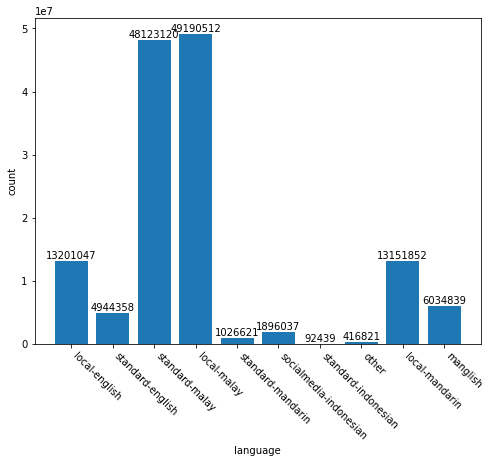

In [6]:
plt.figure(figsize=(8, 6))

plt.bar(categories, values)

# Add numbers on top of the bars
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Label the axes and set the title
plt.xlabel('language')
plt.ylabel('count')

plt.xticks(rotation=-45, ha='left')

# mpl.rcParams['font.family'] = 'Arial'
# mpl.rcParams['font.size'] = 12

plt.show()